In [1]:
%matplotlib inline

import os

import numpy as np
import pandas as pd
import collections as c
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import log_loss
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
from bayes_opt import BayesianOptimization
from fancyimpute import KNN

# Uncomment if xgboost installed
from xgboost import XGBClassifier

import matplotlib.pyplot as plt

# data directory
cwd = os.getcwd()

DATA_DIR = os.path.join(cwd)
print(DATA_DIR)

/home/nick/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


/home/nick/Documents/Sync/Applied ML/PoverT


In [2]:
data_paths = {'A': {'train': os.path.join(DATA_DIR, 'A_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR,'A_hhold_test.csv')}, 
              
              'B': {'train': os.path.join(DATA_DIR,'B_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'B_hhold_test.csv')}, 
              
              'C': {'train': os.path.join(DATA_DIR,'C_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'C_hhold_test.csv')}}

In [3]:
a_train = pd.read_csv(data_paths['A']['train'], index_col='id')
b_train = pd.read_csv(data_paths['B']['train'], index_col='id')
c_train = pd.read_csv(data_paths['C']['train'], index_col='id')

print(a_train.shape)
print(b_train.shape)
print(c_train.shape)

(8203, 345)
(3255, 442)
(6469, 164)


In [4]:
a_train.head()

,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,sArDRIyX,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
id,,,,,,,,,,,,,,,,,,,,,
46107,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,XAmOF,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,LPtkN,vkbkA,qQxrL,AITFl,aQeIm,A
82739,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,lwCkE,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
9646,JhtDR,GUusz,BIZns,ZYabk,uxuSS,PHMVg,NDTCU,sehIp,qNABl,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
10975,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,sPNOc,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
16463,JhtDR,alLXR,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,NdlDR,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,GAZGl,aQeIm,A


In [5]:
b_train.head()

,RzaXNcgd,LfWEhutI,jXOqJdNL,wJthinfa,PTLgvdlQ,ZvEApWrk,euTESpHe,bDVMMSYY,aSzMhjgD,ZehDbxxy,...,YVMuyCUV,AZVtosGB,toZzckhe,BkiXyuSp,ggucvVUs,VMvwrYds,VlNidRNP,rljjAmaN,ChbSWYhO,country
id,,,,,,,,,,,,,,,,,,,,,
57071,zTghO,pYfmQ,lNhMv,42,RQnVj,103,jpSeC,FDqwJ,rxJJI,IbWRL,...,nZcTi,pdvWY,LLuZj,qpzpO,kZRgh,VwGOP,DScEf,SKBnS,Enull,B
18973,zTghO,pYfmQ,lNhMv,34,iuxWN,-2,OLVWN,FDqwJ,ufugi,IbWRL,...,nZcTi,XrijK,LLuZj,qpzpO,kZRgh,VwGOP,JOdCB,SKBnS,Enull,B
20151,zTghO,pYfmQ,lNhMv,34,iuxWN,313,OMRWa,FDqwJ,rxJJI,IbWRL,...,nZcTi,FEjSW,lmjln,qpzpO,kZRgh,VwGOP,JOdCB,SKBnS,Enull,B
5730,zTghO,pYfmQ,lNhMv,58,iuxWN,138,jpSeC,FDqwJ,rxJJI,IbWRL,...,nZcTi,XrijK,lmjln,ZZzXr,kZRgh,VwGOP,ZwQQe,SKBnS,Enull,B
35033,zTghO,pYfmQ,lNhMv,122,iuxWN,68,OLVWN,FDqwJ,rxJJI,IbWRL,...,nZcTi,CRHYU,lmjln,qpzpO,kZRgh,VwGOP,WFgZH,SKBnS,Enull,B


In [7]:
c_train.head()

,GRGAYimk,DNnBfiSI,cNDTCUPU,GvTJUYOo,vmKoAlVH,LhUIIEHQ,DTNyjXJp,PNAiwXUz,ABnhybHK,yiuxBjHP,...,AJHrHUkH,PaEKIlvv,bFEsoTgJ,ihACfisf,obIQUcpS,lAvdypjD,ARWytYMz,eqJPmiPb,mmoCpqWS,country
id,,,,,,,,,,,,,,,,,,,,,
57211,RslOh,SuNUt,gJLrc,EPKkJ,qKiiE,7,XuMYE,-5,QqETe,umyco,...,laFxs,kBQRJ,qcUVH,AmPtx,YXwVA,jSoky,NwjRA,wnPqZ,52,C
62519,jPUAt,boDkI,gJLrc,EPKkJ,YXkKd,7,XuMYE,331,sEJgr,yYwlq,...,laFxs,kBQRJ,eusFW,AmPtx,LSPRW,jSoky,NwjRA,wnPqZ,100,C
11614,OpTiw,boDkI,vURog,EPKkJ,qKiiE,9,XuMYE,-1,sEJgr,umyco,...,laFxs,oUXSJ,eusFW,AmPtx,YXwVA,jSoky,NwjRA,wnPqZ,70,C
6470,RslOh,VgxgY,gJLrc,EPKkJ,YXkKd,9,zfhKi,-5,sEJgr,umyco,...,laFxs,kBQRJ,jqrBN,AmPtx,YXwVA,jSoky,NwjRA,wnPqZ,10,C
33558,IXFlv,VgxgY,kPTaD,EPKkJ,YXkKd,9,XuMYE,23,sEJgr,umyco,...,laFxs,kBQRJ,eusFW,AmPtx,LSPRW,jSoky,herus,wnPqZ,-5,C


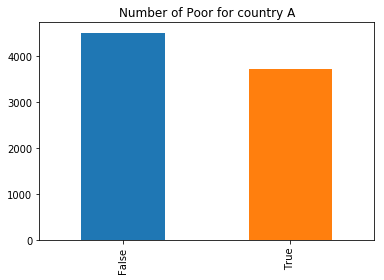

In [8]:
a_train.poor.value_counts().plot.bar(title='Number of Poor for country A');

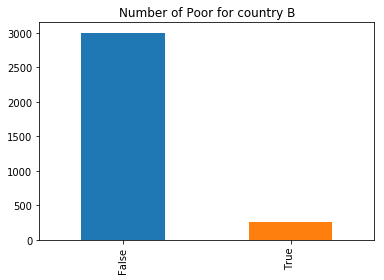

In [9]:
b_train.poor.value_counts().plot.bar(title='Number of Poor for country B');

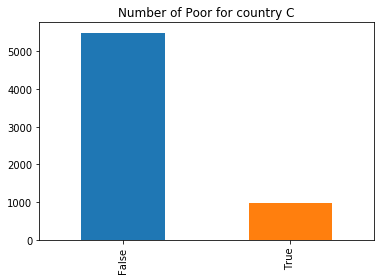

In [10]:
c_train.poor.value_counts().plot.bar(title='Number of Poor for country C');

In [14]:
# Check for any missing values in the data
print(pd.isnull(a_train).any().value_counts())
print(pd.isnull(b_train).any().value_counts())
# 9 missing values in b_train
print(pd.isnull(c_train).any().value_counts())

False    345
dtype: int64
False    433
True       9
dtype: int64
False    164
dtype: int64


In [15]:
b_train_na = (b_train.isnull().sum() / len(b_train)) * 100
b_train_na = b_train_na.drop(b_train_na[b_train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :b_train_na})
missing_data.head(20)



,Missing Ratio
IrxBnWxE,91.643625
dnlnKrAg,83.655914
FGWqGkmD,81.505376
umkFMfvA,72.657450
aAufyreG,72.073733
BRzuVmyf,44.884793
OSmfjCbE,23.072197
McFBIGsm,23.072197
BXOWgPgL,23.072197


In [16]:
def pre_process_data(df, enforce_cols=None):
    print("Input shape:\t{}".format(df.shape))
                
    # create ordinal categorical variables
    df_obj = df.select_dtypes(include='object').apply(LabelEncoder().fit_transform)
    df_num = df.select_dtypes(include=['float64', 'int64', 'bool'])
    df = pd.concat([df_obj, df_num], axis=1)
    col_names = list(df.columns.values)
    index = df.index
    print("After converting categoricals:\t{}".format(df.shape))
    

    # match test set and training set columns
    if enforce_cols is not None:
        to_drop = np.setdiff1d(df.columns, enforce_cols)
        to_add = np.setdiff1d(enforce_cols, df.columns)

        df.drop(to_drop, axis=1, inplace=True)
        df = df.assign(**{c: 0 for c in to_add})
    
    # Impute missing values
    if pd.isnull(df).any().any():
        df = pd.DataFrame(KNN(k=3).complete(df))
        df.columns = col_names
        df.index = index
    
    cols = list(df.columns.values)
    sortedcols = sorted(cols)
    
    df = df[sortedcols]
    
    return df

In [17]:
a_train = pre_process_data(a_train)
b_train = pre_process_data(b_train)
c_train = pre_process_data(c_train)

Input shape:	(8203, 345)
After converting categoricals:	(8203, 345)
Input shape:	(3255, 442)
After converting categoricals:	(3255, 442)
Imputing row 1/3255 with 6 missing, elapsed time: 21.399
Imputing row 101/3255 with 5 missing, elapsed time: 21.413
Imputing row 201/3255 with 6 missing, elapsed time: 21.427
Imputing row 301/3255 with 2 missing, elapsed time: 21.440
Imputing row 401/3255 with 4 missing, elapsed time: 21.455
Imputing row 501/3255 with 6 missing, elapsed time: 21.469
Imputing row 601/3255 with 4 missing, elapsed time: 21.482
Imputing row 701/3255 with 5 missing, elapsed time: 21.495
Imputing row 801/3255 with 5 missing, elapsed time: 21.509
Imputing row 901/3255 with 4 missing, elapsed time: 21.523
Imputing row 1001/3255 with 5 missing, elapsed time: 21.536
Imputing row 1101/3255 with 3 missing, elapsed time: 21.551
Imputing row 1201/3255 with 5 missing, elapsed time: 21.565
Imputing row 1301/3255 with 6 missing, elapsed time: 21.578
Imputing row 1401/3255 with 3 missin

In [18]:
aX_train_full = a_train.drop('poor', axis=1)
bX_train_full = b_train.drop('poor', axis=1)
cX_train_full = c_train.drop('poor', axis=1)

aY_train_full = np.ravel(a_train.poor)
bY_train_full = np.ravel(b_train.poor)
cY_train_full = np.ravel(c_train.poor)


In [19]:
def valset(df, poor_prop = 0.5, not_poor_prop = 0.5):
    """ Generates X and Y train and validation sets"""

    poor = df['poor'] == True
    notpoor = df['poor'] == False
    
    df_poor_t = df[poor]
    dfX_poor = df_poor_t.drop('poor', axis=1)
    
    df_not_poor_t = df[notpoor]
    dfX_not_poor = df_not_poor_t.drop('poor', axis=1)
    
    dfY_poor = np.ravel(df_poor_t.poor)
    dfY_not_poor = np.ravel(df_not_poor_t.poor)
    
    Xtrain_poor, Xval_poor, Ytrain_poor, Yval_poor = train_test_split(dfX_poor, dfY_poor, test_size= poor_prop, random_state=42)
    Xtrain_notpoor, Xval_notpoor, Ytrain_notpoor, Yval_notpoor = train_test_split(dfX_not_poor, dfY_not_poor, test_size= not_poor_prop, random_state=42)
    
    X_train = pd.concat([Xtrain_poor, Xtrain_notpoor],axis = 0)
    X_val = pd.concat([Xval_poor, Xval_notpoor],axis = 0)

    Y_train = np.concatenate((Ytrain_poor, Ytrain_notpoor),axis = 0)
    Y_val = np.concatenate((Yval_poor, Yval_notpoor),axis = 0)
    print(c.Counter(Y_val))
    
    return X_train, X_val, Y_train, Y_val

In [20]:
aX_train, aX_val, aY_train, aY_val = valset(a_train, poor_prop = 0.33, not_poor_prop = 0.33)
bX_train, bX_val, bY_train, bY_val = valset(b_train, poor_prop = 0.2, not_poor_prop = 0.066)
cX_train, cX_val, cY_train, cY_val = valset(c_train, poor_prop = 0.33, not_poor_prop = 0.1)

Counter({False: 1485, True: 1222})
Counter({0.0: 199, 1.0: 51})
Counter({False: 550, True: 322})


In [21]:
bY_train.shape

(3005,)

In [22]:
# Load test data 
a_test = pd.read_csv(data_paths['A']['test'], index_col='id')
b_test = pd.read_csv(data_paths['B']['test'], index_col='id')
c_test = pd.read_csv(data_paths['C']['test'], index_col='id')

In [23]:
# preprocess test data
a_test = pre_process_data(a_test, enforce_cols=aX_train.columns)
b_test = pre_process_data(b_test, enforce_cols=bX_train.columns)
c_test = pre_process_data(c_test, enforce_cols=cX_train.columns)

Input shape:	(4041, 344)
After converting categoricals:	(4041, 344)
Input shape:	(1604, 441)
After converting categoricals:	(1604, 441)
Imputing row 1/1604 with 5 missing, elapsed time: 4.941
Imputing row 101/1604 with 4 missing, elapsed time: 4.952
Imputing row 201/1604 with 5 missing, elapsed time: 4.964
Imputing row 301/1604 with 5 missing, elapsed time: 4.974
Imputing row 401/1604 with 4 missing, elapsed time: 4.985
Imputing row 501/1604 with 4 missing, elapsed time: 4.996
Imputing row 601/1604 with 5 missing, elapsed time: 5.007
Imputing row 701/1604 with 5 missing, elapsed time: 5.017
Imputing row 801/1604 with 5 missing, elapsed time: 5.026
Imputing row 901/1604 with 4 missing, elapsed time: 5.036
Imputing row 1001/1604 with 5 missing, elapsed time: 5.045
Imputing row 1101/1604 with 3 missing, elapsed time: 5.055
Imputing row 1201/1604 with 4 missing, elapsed time: 5.065
Imputing row 1301/1604 with 4 missing, elapsed time: 5.075
Imputing row 1401/1604 with 4 missing, elapsed tim

In [25]:
def train_model(features, labels, learning_rate=0.125, min_child_weight = 2 , max_depth = 2, n_estimators = 200, reg_alpha = 0.5, gamma = 0.75, **kwargs):
    
    # instantiate model
    model = XGBClassifier(learning_rate=learning_rate, min_child_weight = min_child_weight, max_depth = max_depth, n_estimators = n_estimators, reg_alpha = reg_alpha, gamma = reg_alpha)
    
    # train model
    model.fit(features, labels)
    
    # get a (not-very-useful) sense of performance
    accuracy = model.score(features, labels)
    print("In-sample accuracy:", accuracy)
    
    return model

In [26]:
model_a_valid = train_model(aX_train, aY_train, learning_rate=0.125, n_estimators=200, 
                            min_child_weight = 4 , max_depth = 4, 
                            reg_alpha = 0.5, gamma = 0.6)


In-sample accuracy: 0.953966521106


In [27]:
model_b_valid = train_model(bX_train, bY_train, learning_rate=0.125, 
                            n_estimators=100, min_child_weight = 2 , 
                            max_depth = 2, reg_alpha = 0.5, gamma = 0.75)


In-sample accuracy: 0.946755407654


In [28]:
model_c_valid = train_model(cX_train, cY_train, learning_rate=0.125, 
                            n_estimators=100, min_child_weight = 2 , 
                            max_depth = 2, reg_alpha = 0.7, gamma = 0.75)


In-sample accuracy: 0.998570662855


In [29]:
a_preds_v_temp = model_a_valid.predict_proba(aX_val)
b_preds_v_temp = model_b_valid.predict_proba(bX_val)
c_preds_v_temp = model_c_valid.predict_proba(cX_val)

In [30]:
# Validation loss

a_preds_valid = a_preds_v_temp[:,1]
b_preds_valid = b_preds_v_temp[:,1]
c_preds_valid = c_preds_v_temp[:,1]

#preds_valid = np.concatenate((a_preds_valid, b_preds_valid, c_preds_valid))
#y_valid = np.concatenate((ay_valid, by_valid, cy_valid))

#validation_loss = log_loss(y_valid, preds_valid)
#print(validation_loss)

a_validation_loss = log_loss(aY_val, a_preds_valid)

b_validation_loss = log_loss(bY_val, b_preds_valid)

c_validation_loss = log_loss(cY_val, c_preds_valid)

print("validation score:")
print(np.mean([a_validation_loss, b_validation_loss, c_validation_loss])) #0.2667 n = 100
# 0.2773791105085713

validation score:
0.275834194573


In [31]:

model_a = train_model(aX_train_full, aY_train_full, learning_rate=0.125, n_estimators=200, 
                            min_child_weight = 4 , max_depth = 4, 
                            reg_alpha = 0.5, gamma = 0.6)

model_b = train_model(bX_train_full, bY_train_full, learning_rate=0.125, 
                            n_estimators=100, min_child_weight = 2 , 
                            max_depth = 2, reg_alpha = 0.5, gamma = 0.75)

model_c = train_model(cX_train_full, cY_train_full, learning_rate=0.125, 
                            n_estimators=100, min_child_weight = 2 , 
                            max_depth = 2, reg_alpha = 0.7, gamma = 0.75)



In-sample accuracy: 0.942216262343


/home/nick/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nick/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In-sample accuracy: 0.936405529954
In-sample accuracy: 0.997681249034


In [32]:
a_preds = model_a.predict_proba(a_test)
b_preds = model_b.predict_proba(b_test)
c_preds = model_c.predict_proba(c_test)

In [33]:
def make_country_sub(preds, test_feat, country):
    # make sure we code the country correctly
    country_codes = ['A', 'B', 'C']
    
    # get just the poor probabilities
    country_sub = pd.DataFrame(data=preds[:, 1],  # proba p=1
                               columns=['poor'], 
                               index=test_feat.index)

    
    # add the country code for joining later
    country_sub["country"] = country
    return country_sub[["country", "poor"]]

In [34]:
# convert preds to data frames
a_sub = make_country_sub(a_preds, a_test, 'A')
b_sub = make_country_sub(b_preds, b_test, 'B')
c_sub = make_country_sub(c_preds, c_test, 'C')

In [35]:
submission = pd.concat([a_sub, b_sub, c_sub])


In [36]:
submission.to_csv('submission.csv')